<a href="https://colab.research.google.com/github/myazann/Lung_Cancer/blob/main/Lung_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf sample_data
!rm sample.py
!rm README.md

import pandas as pd
import json
import os
import copy
import random
import numpy as np
import torchvision.transforms as transforms
import torch
import cv2
from PIL import Image
from torch.utils.data import Dataset
import itertools

In [2]:
!cp ./drive/MyDrive/bboxs.json .
!cp ./drive/MyDrive/lung_ct_train.zip .
!cp ./drive/MyDrive/lung_ct_val.zip .

!unzip lung_ct_train.zip > /dev/null
!rm lung_ct_train.zip
!unzip lung_ct_val.zip > /dev/null
!rm lung_ct_val.zip

with open('bboxs.json') as json_file:
  bboxs = json.load(json_file)

##Necessary functions



In [77]:
##Function to visualize an image with its corresponding label

def get_img_with_bbox(im, labels):

  d_im = copy.deepcopy(im.numpy().squeeze())

  xmax = int(labels["xmax"])
  xmin = int(labels["xmin"])
  ymax = int(labels["ymax"])
  ymin = int(labels["ymin"])

  cv2.rectangle(d_im, (xmin, ymin), (xmax, ymax), (255,255,255), 2)

  display(Image.fromarray(d_im))

## Function to get paths of images
def get_image_paths(train):

  file_paths = []

  if train:
    for ptnt in os.listdir("lung_ct_train"):
      for img in os.listdir("lung_ct_train/" + ptnt):
        fp = "lung_ct_train/" + ptnt + "/" + img
        file_paths.append(fp)

  else:
    for ptnt in os.listdir("lung_ct_val"):
      for img in os.listdir("lung_ct_val/" + ptnt):
        fp = "lung_ct_val/" + ptnt + "/" + img
        file_paths.append(fp)

  return file_paths

## Create Image Dataset


In [86]:
class CTDataset(torch.utils.data.Dataset):

  def __init__(self, train=True, transform=True):

    self.transform = transform 
    self.train = train
    self.imgs = get_image_paths(self.train)
    self.labels = bboxs  
        
  def __getitem__(self, index):

    im = cv2.imread(self.imgs[index])
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

    im = torch.tensor(im)[None, ...]
    if self.transform:
      im = self.preprocess(im)

    img_name = self.imgs[index].split("/")[-1].split(".j")[0]
    item_label = self.labels[img_name]

    item_label["img_name"] = img_name

    return im, item_label

  def __len__(self):
    return len(self.imgs)

  def preprocess(self, img):

      return transforms.Compose(
      [
      transforms.CenterCrop(384),
      transforms.RandomHorizontalFlip(0.5),
      transforms.RandomRotation(30),
      transforms.RandomVerticalFlip(),
      transforms.GaussianBlur(3),
      ]
      )(img)

In [87]:
ct_train = CTDataset(train=True, transform=False)
ct_val = CTDataset(train=False, transform=preprocess)

##See randomly selected 10 images

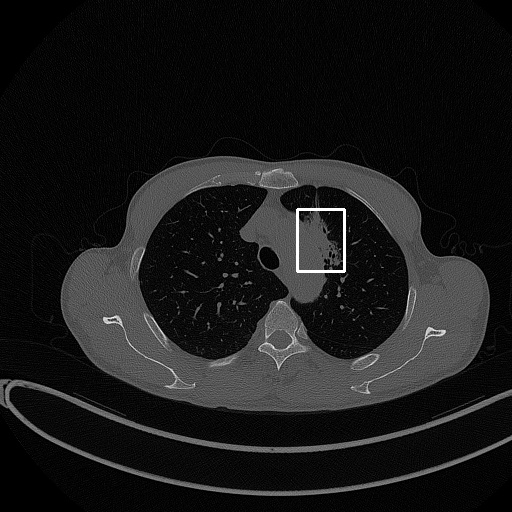

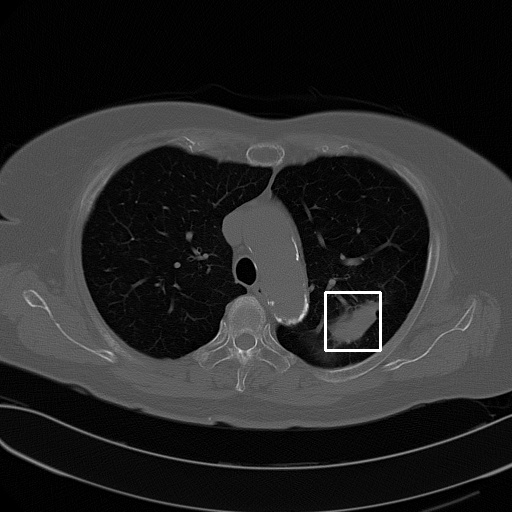

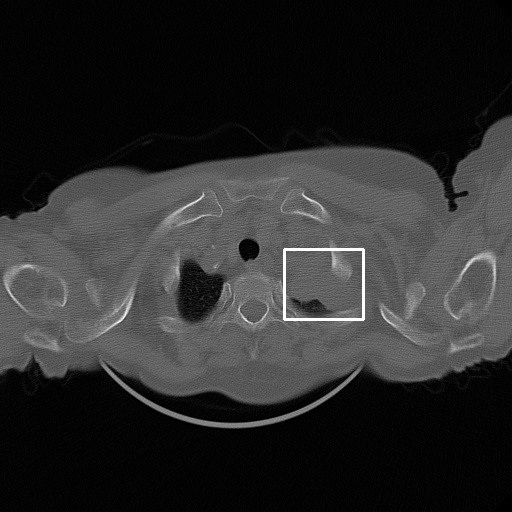

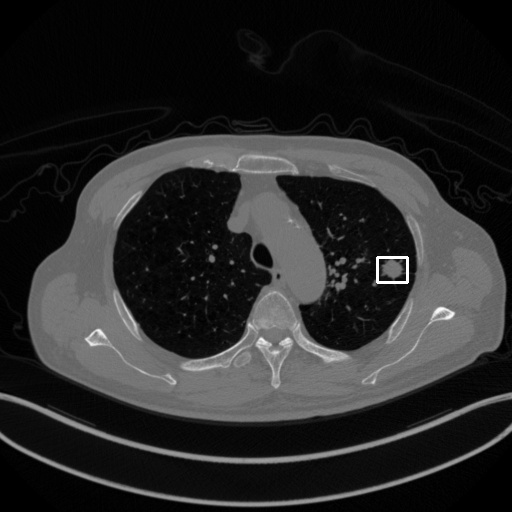

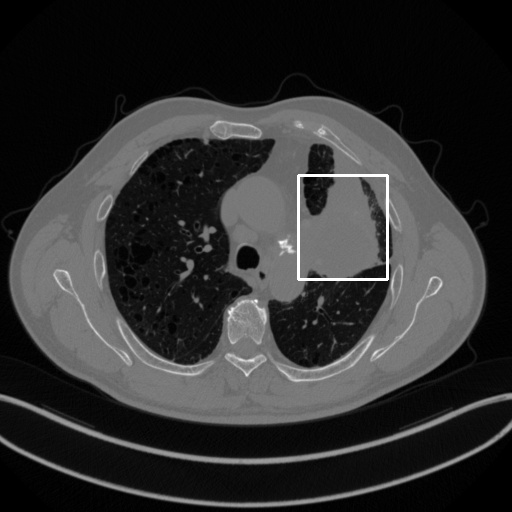

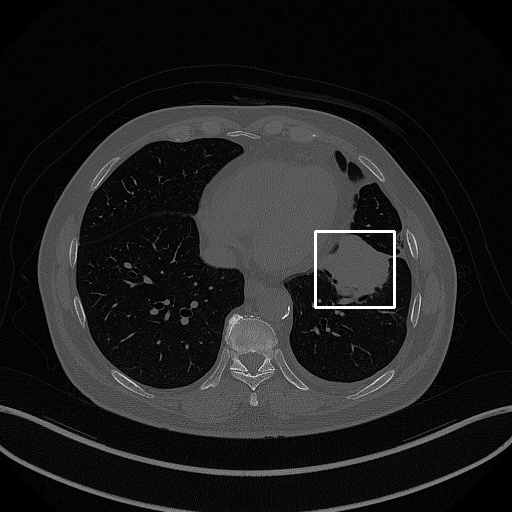

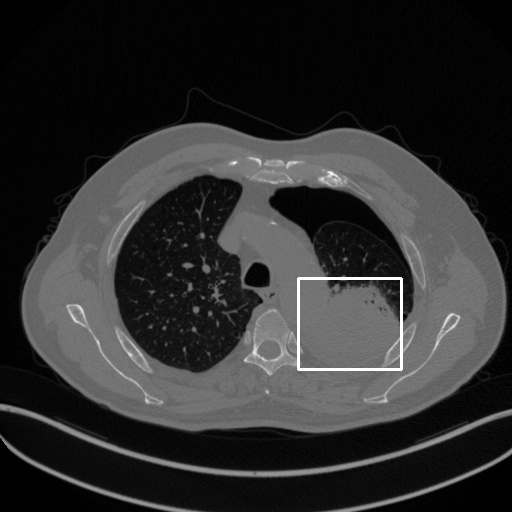

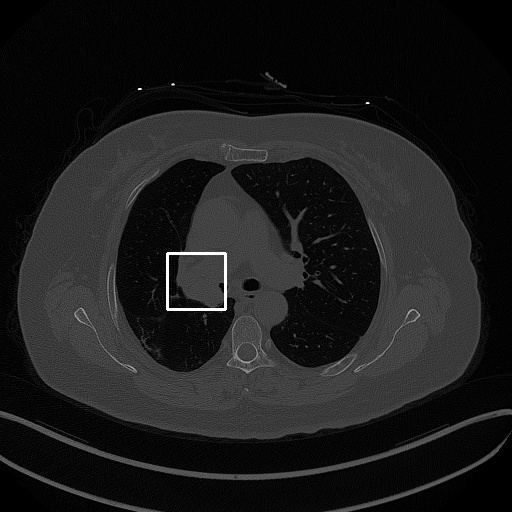

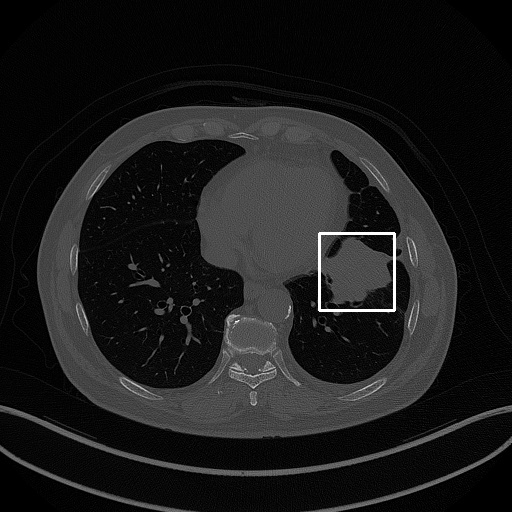

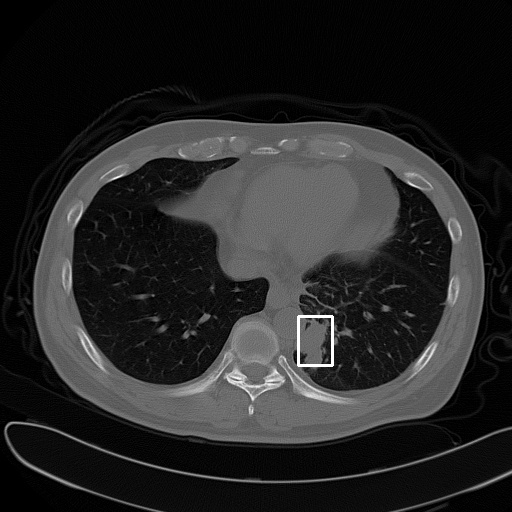

In [78]:
rs = random.sample(range(0, len(ct_train)), 10)

for elem in rs:
  get_img_with_bbox(ct_train[elem][0], ct_train[elem][1])
  print("\n")